In [62]:
import netCDF4 as nc
import pylab as plt
import numpy as np
from mpl_toolkits.basemap import Basemap, shiftgrid
import cf
import cfplot as cfp
import matplotlib

## Import xltln data with emissions included

In [63]:
data = nc.Dataset('/shared/netscratch/ptg21/UM_data/xltln/xltln_ch4.nc')
#extract variables to arrays
ch4 = data.variables['ch4'][:]
#lat = data.variables['latitude'][:]
lon = data.variables['longitude'][:]
#alt = data.variables['level_height'][:]

ch4, lon = shiftgrid(180.,ch4,lon,start=False)

In [64]:
mass_data = nc.Dataset('/shared/netscratch/ptg21/UM_data/xltln/xltln_airmass.nc')
mass = mass_data.variables['airmass_atm']

In [65]:
time = data.variables['time']
dtime = nc.num2date(time[:],time.units)

## Import fixed LBC data

In [66]:
data_lbc = nc.Dataset('/shared/netscratch/ptg21/UM_data/xgywn/xgywn_pm7-9.nc')
#extract variables to arrays
ch4_lbc = data_lbc.variables['field34009'][:]
#lat_lbc = data_lbc.variables['latitude'][:]
lon_lbc = data_lbc.variables['longitude'][:]
#box_no_lbc = data_lbc.variables['model_level_number'][:]
#alt_lbc = data_lbc.variables['hybrid_ht'][:]
mass_lbc = data_lbc.variables['field34363'][:]

time_lbc = data_lbc.variables['t']
dtime_lbc = nc.num2date(time_lbc[:],time_lbc.units)

ch4_lbc, lon_lbc = shiftgrid(180.,ch4_lbc,lon_lbc,start=False)

## Burden calculations

In [67]:
#xltln burden calc
ch4_kg = np.multiply(mass,ch4) #ch4 in kg
bur_1 = ch4_kg.sum(axis=(1,2,3))/1e9 # sum over lat, lon, alt

In [68]:
#xgywn burden calc
ch4_lbc_kg = np.multiply(mass_lbc,ch4_lbc)
bur_lbc = ch4_lbc_kg.sum(axis=(1,2,3))/1e9

In [85]:
bur_1_mean = np.mean(bur_1)
bur_1_std = bur_1.std()

bur_2_mean = np.mean(bur_lbc)
bur_2_std = bur_lbc.std()

print(f'xltln mean ch4 burden: {bur_1_mean:.0f} Tg, std = {bur_1_std:.1f} Tg')
print(f'xgywn mean ch4 burden: {bur_2_mean:.0f} Tg, std = {bur_2_std:.1f} Tg')

xltln mean ch4 burden: 4789 Tg, std = 3.4 Tg
xgywn mean ch4 burden: 4846 Tg, std = 1.5 Tg


## Burden plots

Text(0.5, 1.0, 'CH4 burden over time (xltln)')

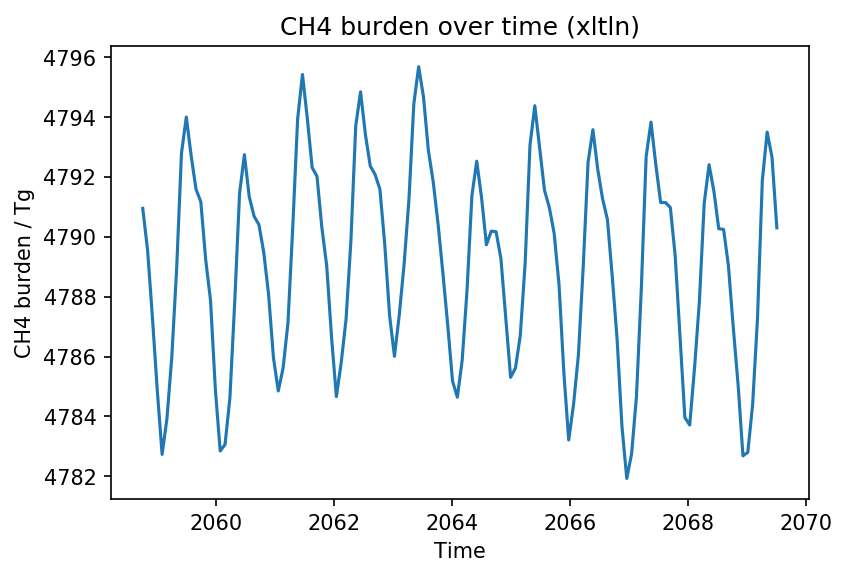

In [77]:
fig = plt.figure(dpi=150)
ax = plt.axes()
ax.plot(dtime,bur_1)
plt.xlabel('Time')
plt.ylabel('CH4 burden / Tg')
plt.title(f'CH4 burden over time (xltln)')

Text(0.5, 1.0, 'CH4 burden over time (xgywn)')

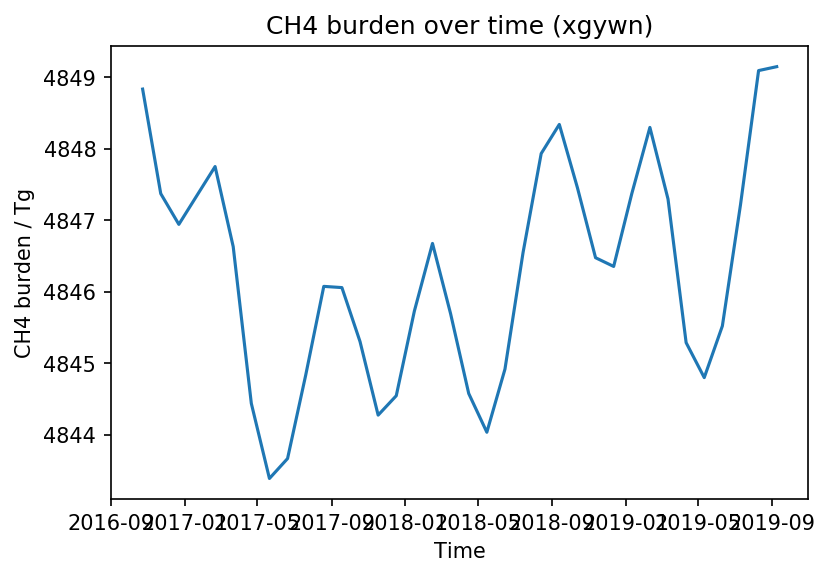

In [76]:
fig = plt.figure(dpi=150)
ax = plt.axes()
ax.plot(dtime_lbc,bur_lbc)
plt.xlabel('Time')
plt.ylabel('CH4 burden / Tg')
plt.title(f'CH4 burden over time (xgywn)')

## Preview data

In [8]:
print(data.variables['ch4'])
print()
print(data_lbc.variables)

<class 'netCDF4._netCDF4.Variable'>
float32 ch4(time, model_level_number, latitude, longitude)
    long_name: CH4
    units: kg kg-1
    um_stash_source: m01s34i009
    cell_methods: time: mean (interval: 1 hour)
    grid_mapping: latitude_longitude
    coordinates: forecast_period forecast_reference_time level_height sigma
unlimited dimensions: time
current shape = (132, 60, 73, 96)
filling on, default _FillValue of 9.969209968386869e+36 used

{'longitude': <class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    units: degrees_east
    point_spacing: even
    modulo:  
unlimited dimensions: 
current shape = (96,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'latitude': <class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    units: degrees_north
    point_spacing: even
unlimited dimensions: 
current shape = (73,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'hybrid_ht': <class 'netCDF4._netCDF4.Variable'>
float32 hybrid_ht(hybri